# Data Preprocessing Step

Here we implement all possible data preprocessing utils that are going to be used before feature extraction

### Data fields:
- Id
- ResidentStatus
- Education1989Revision
- Education2003Revision
- EducationReportingFlag
- MonthOfDeath
- Sex
- AgeType
- Age
- AgeSubstitutionFlag
- AgeRecode52
- AgeRecode27
- AgeRecode12
- InfantAgeRecode22
- PlaceOfDeathAndDecedentsStatus
- MaritalStatus
- DayOfWeekOfDeath
- CurrentDataYear
- InjuryAtWork
- MannerOfDeath
- MethodOfDisposition
- Autopsy
- ActivityCode
- PlaceOfInjury
- Icd10Code
- CauseRecode358
- CauseRecode113
- InfantCauseRecode130
- CauseRecode39
- NumberOfEntityAxisConditions
- NumberOfRecordAxisConditions
- Race
- BridgedRaceFlag
- RaceImputationFlag
- RaceRecode3
- RaceRecode5
- HispanicOrigin
- HispanicOriginRaceRecode

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sqlite3
import numpy as np
import pandas as pd

In [2]:
skipcols = (6, 15, 18, 20, 21, 24)
usecols = [n for n in range(38) if n not in skipcols]

In [3]:
#?pd.read_csv

In [4]:
pd_data = pd.read_csv('data/DeathRecords.csv', index_col=0)

In [19]:
pd_data

,ResidentStatus,Education1989Revision,Education2003Revision,EducationReportingFlag,MonthOfDeath,Sex,AgeType,Age,AgeSubstitutionFlag,AgeRecode52,...,CauseRecode39,NumberOfEntityAxisConditions,NumberOfRecordAxisConditions,Race,BridgedRaceFlag,RaceImputationFlag,RaceRecode3,RaceRecode5,HispanicOrigin,HispanicOriginRaceRecode
Id,,,,,,,,,,,,,,,,,,,,,
1,1,0,2,1,1,M,1,87,0,43,...,24,1,1,1,0,0,1,1,100,6
2,1,0,2,1,1,M,1,58,0,37,...,21,3,3,1,0,0,1,1,100,6
3,1,0,7,1,1,F,1,75,0,41,...,28,2,2,1,0,0,1,1,100,6
4,1,0,6,1,1,M,1,74,0,40,...,22,3,3,1,0,0,1,1,100,6
5,1,0,3,1,1,M,1,64,0,38,...,21,1,1,1,0,0,1,1,100,6
6,1,0,5,1,1,F,1,93,0,44,...,37,5,5,1,0,0,1,1,100,6
7,1,0,4,1,1,M,1,82,0,42,...,21,4,3,1,0,0,1,1,100,6
8,1,0,4,1,1,M,1,55,0,37,...,21,2,2,2,1,0,3,2,100,7
9,1,0,3,1,1,F,1,86,0,43,...,37,1,1,1,0,0,1,1,100,6


In [5]:
pd_data.shape

(2631171, 37)

# Education
Categories we extract from the data about education

- 0: Unkown
- 1: 8th grade or less
- 2: 12th grade, no diploma
- 3: high school graduate or GED completed
- 4: some college credit, but no degree, Associate degree
- 5: Bachelor's degree
- 6: Master's degree or higher


In [6]:
# Eduction category

def education_category_89(category):
    if category <= 0:
        return 0
    elif category <= 8:
        return 1
    elif category <= 11:
        return 2
    elif category <= 12:
        return 3
    elif category <= 15:
        return 4
    elif category <= 16:
        return 5
    elif category <= 17:
        return 6
    else:
        return 0

def education_category_03(category):
    if category == 5:
        return 4
    elif category == 6:
        return 5
    elif category == 7 or category == 8:
        return 6
    elif category == 9:
        return 0
    else:
        return category
    

def education_category(record_type, category89, category03):
    if record_type == 0:
        return education_category_89(category89)
    if record_type == 1:
        return education_category_03(category03)

In [7]:
#education_categories = pd_data.apply(
#    lambda x: education_category(int(x['EducationReportingFlag']),
#                                 int(x['Education1989Revision']),
#                                 int(x['Education2003Revision'])), axis=1)

In [8]:
from pickle import load
education_categories = load(open("education_categories.pickle", "rb"))

In [9]:
education_categories

Id
1          2
2          2
3          6
4          5
5          3
6          4
7          4
8          4
9          3
10         3
11         3
12         2
13         4
14         3
15         3
16         4
17         5
18         4
19         1
20         3
21         3
22         6
23         3
24         6
25         4
26         6
27         6
28         3
29         2
30         2
          ..
2631142    1
2631143    0
2631144    0
2631145    0
2631146    0
2631147    5
2631148    1
2631149    1
2631150    0
2631151    0
2631152    1
2631153    1
2631154    0
2631155    0
2631156    1
2631157    1
2631158    0
2631159    0
2631160    4
2631161    1
2631162    0
2631163    0
2631164    1
2631165    0
2631166    0
2631167    5
2631168    0
2631169    1
2631170    0
2631171    1
dtype: int64

In [10]:
from pickle import dump
dump(education_categories, open("education_categories.pickle", "wb"))

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

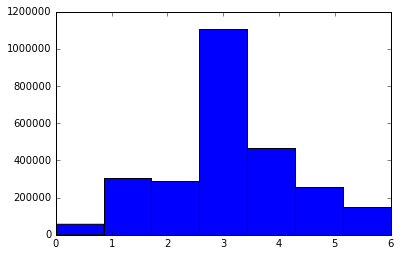

In [17]:
plt.hist(education_categories.as_matrix(), bins = 7)
plt.show()

# Sex
* 0: Male
* 1: Female

In [20]:
def sex_category(sex):
    if sex == 'M':
        return 0
    elif sex == 'F':
        return 1
    else:
        return 2

sex_categories = pd_data.apply(
    lambda x: sex_category(x["Sex"]), axis=1)

dump(sex_categories, open("sex_categories.pickle", "wb"))

In [40]:
sex_categories = load(open("sex_categories.pickle", "rb"))

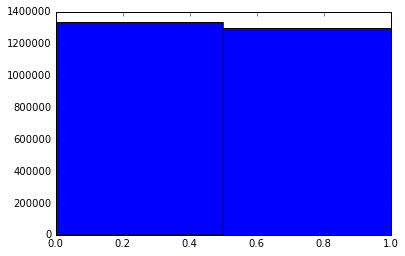

In [27]:
plt.hist(sex_categories.as_matrix(), bins = 2)
plt.show()

# Age
Age into 27 bins

* 01 : Under 1 month (includes not stated weeks, days, hours, and minutes)
* 02 : 1 month - 11 months (includes not stated months)
* 03 : 1 year
* 04 : 2 years
* 05 : 3 years
* 06 : 4 years
* 07 : 5 -  9 years
* 08 : 10 - 14 years
* 09 :  15 - 19 years
* 10 : 20 - 24 years
* 11 : 25 - 29 years
* 12 : 30 - 34 years
* 13 : 35 - 39 years
* 14 : 40 - 44 years
* 15 : 45 - 49 years
* 16 : 50 - 54 years
* 17 : 55 - 59 years
* 18 : 60 - 64 years
* 19 : 65 - 69 years
* 20 : 70 - 74 years 
* 21 : 75 - 79 years
* 22 : 80 - 84 years
* 23 : 85 - 89 years
* 24 : 90 - 94 years
* 25 : 95 - 99 years
* 26 : 100 years and over
* 27 : Age not stated

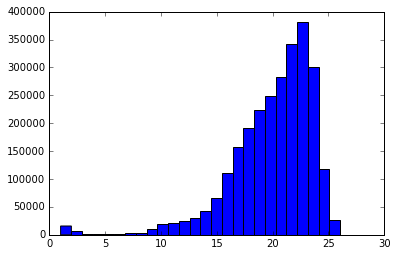

In [29]:
plt.hist(pd_data["AgeRecode27"].as_matrix(), bins = 27)
plt.show()

# Race
Race encoded into 3 bins

* 1 : White
* 2 : Races other than White or Black
* 3 : Black

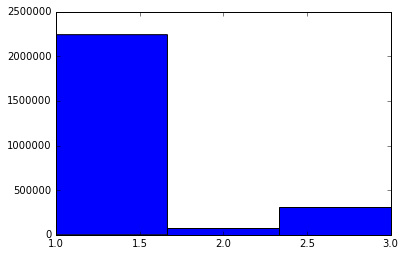

In [36]:
plt.hist(pd_data["RaceRecode3"].as_matrix(), bins = 3)
plt.show()

# Cause of death
Cause of death into 39 bins.
See http://www.cdc.gov/nchs/data/dvs/Record_Layout_2014.pdf p19.

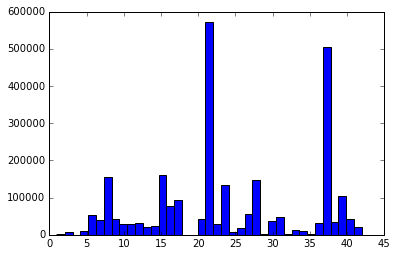

In [38]:
plt.hist(pd_data["CauseRecode39"].as_matrix(), bins = 39)
plt.show()

# Martial status
* 0 : Never married, single
* 1 : Married
* 2 : Widowed
* 3 : Divorced
* 4 : Marital Status unknown

In [42]:
def status_category(status):
    if status == 'S':
        return 0
    elif status == 'M':
        return 1
    elif status == 'W':
        return 2
    elif status == 'D':
        return 3
    else:
        return 4

status_categories = pd_data.apply(
    lambda x: status_category(x["MaritalStatus"]), axis=1)

dump(status_categories, open("status_categories.pickle", "wb"))

In [43]:
status_categories = load(open("status_categories.pickle", "rb"))

In [46]:
status_categories.shape

(2631171,)

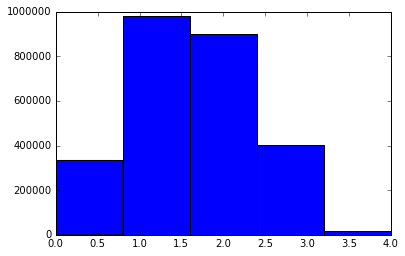

In [44]:
plt.hist(status_categories.as_matrix(), bins = 5)
plt.show()